# CIFAR100 (Canadian Institute For Advanced Research 100)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import cifar100
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, ReLU, Softmax
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## CNN


In [8]:
cnn = Sequential(
    layers=[
        Input(shape=(32, 32, 3)),
        Conv2D(filters=32, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Conv2D(filters=64, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Flatten(),
        Dense(128),
        ReLU(),
        Dense(100),
        Softmax(),
    ],
    name="cnn",
)

In [9]:
cnn.layers

[<Conv2D name=conv2d, built=True>,
 <ReLU name=re_lu, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <ReLU name=re_lu_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <ReLU name=re_lu_2, built=True>,
 <Dense name=dense_1, built=True>,
 <Softmax name=softmax, built=True>]

In [10]:
cnn.summary()

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 100)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556,708 (2.12 MB)

 Trainable params: 556,708 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
cnn.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

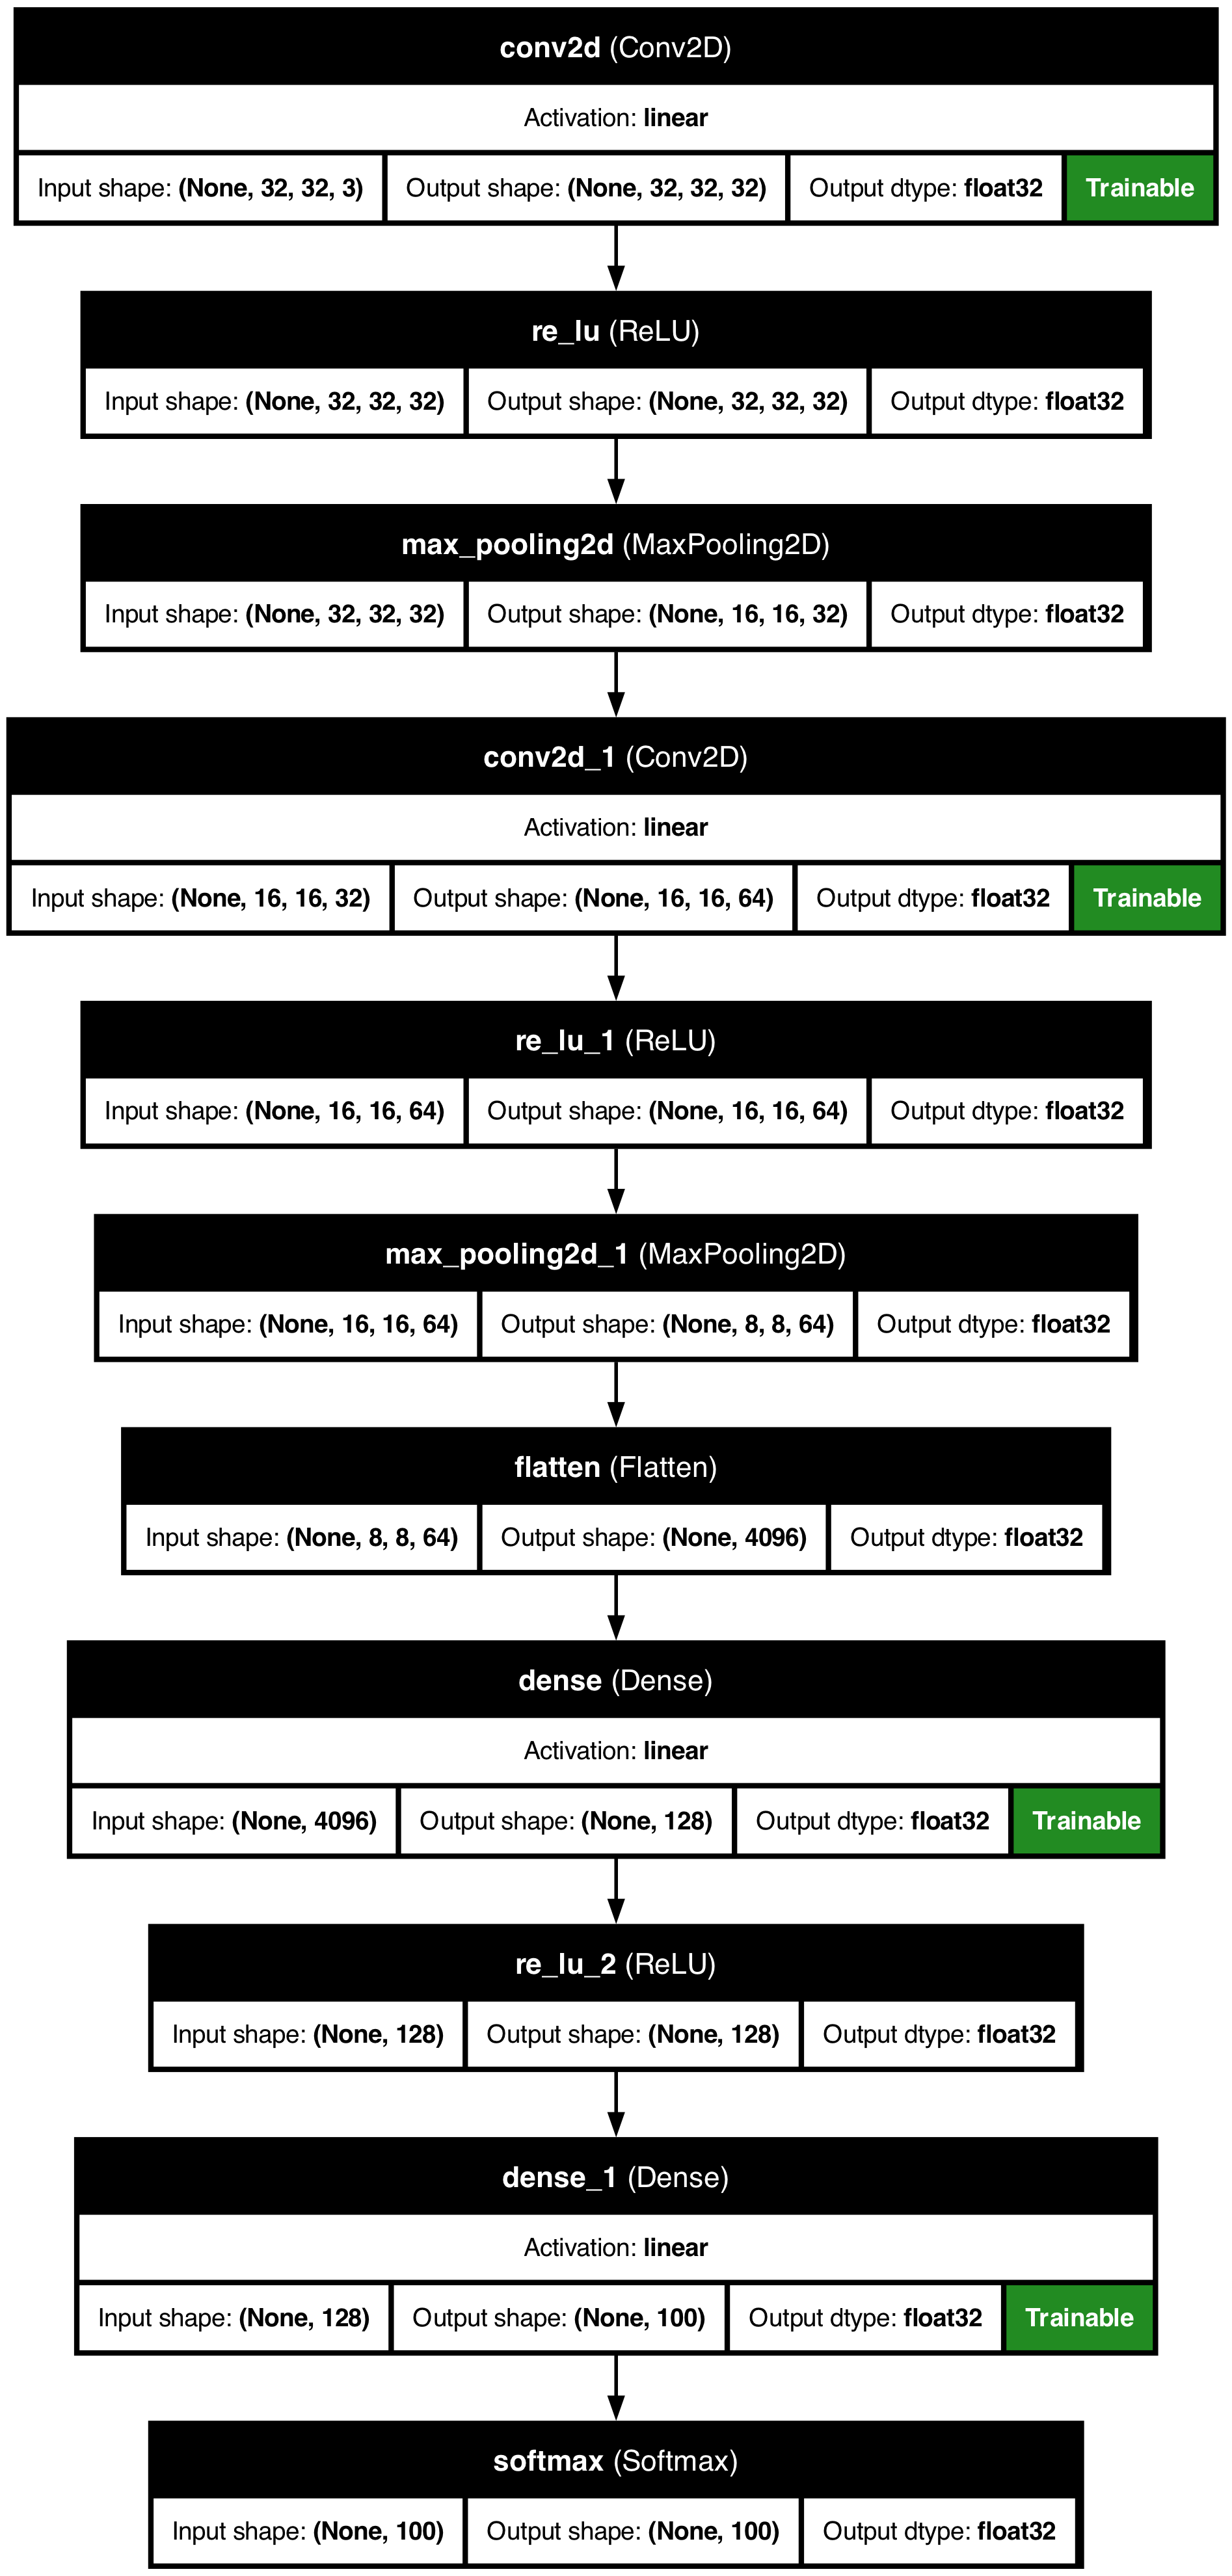

In [12]:
plot_model(
    cnn,
    to_file="Images/cifar100_cnn.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [13]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../../../Models/cifar100_cnn.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../../../Logs/cifar100_cnn_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/cifar10_cnn_logs"

cnn_csvlogger_callback = CSVLogger(
    "../../../Logs/cifar100_cnn_logs/cifar100_cnn_logs.csv"
)

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2,
    callbacks=[
        cnn_checkpoint_callback,
        cnn_tensorboard_callback,
        cnn_csvlogger_callback,
    ],
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - loss: 4.1477 - sparse_categorical_accuracy: 0.0761 - val_loss: 3.3123 - val_sparse_categorical_accuracy: 0.2107
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - loss: 3.1274 - sparse_categorical_accuracy: 0.2441 - val_loss: 3.0083 - val_sparse_categorical_accuracy: 0.2632
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - loss: 2.7265 - sparse_categorical_accuracy: 0.3209 - val_loss: 2.7882 - val_sparse_categorical_accuracy: 0.3132
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - loss: 2.4858 - sparse_categorical_accuracy: 0.3705 - val_loss: 2.7081 - val_sparse_categorical_accuracy: 0.3329
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - loss: 2.2643 - sparse_categorical_accuracy: 0.4166 - val_loss: 2.6169 - val_sparse_categorical_accuracy: 0.3496
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - loss: 2.0754 - sparse_categorical_accuracy: 0.4585 - val_loss: 2.6630 - val_sparse_categorical_accuracy:

In [14]:
cnn_train_loss = cnn_history.history["loss"]
cnn_train_acc = cnn_history.history["sparse_categorical_accuracy"]
cnn_val_loss = cnn_history.history["val_loss"]
cnn_val_acc = cnn_history.history["val_sparse_categorical_accuracy"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 2.3341723680496216
Validation loss: 2.7992300033569335
0.409045 Training accuracy with a standard deviation of 0.133089
0.325270 Validation accuracy with a standard deviation of 0.047743


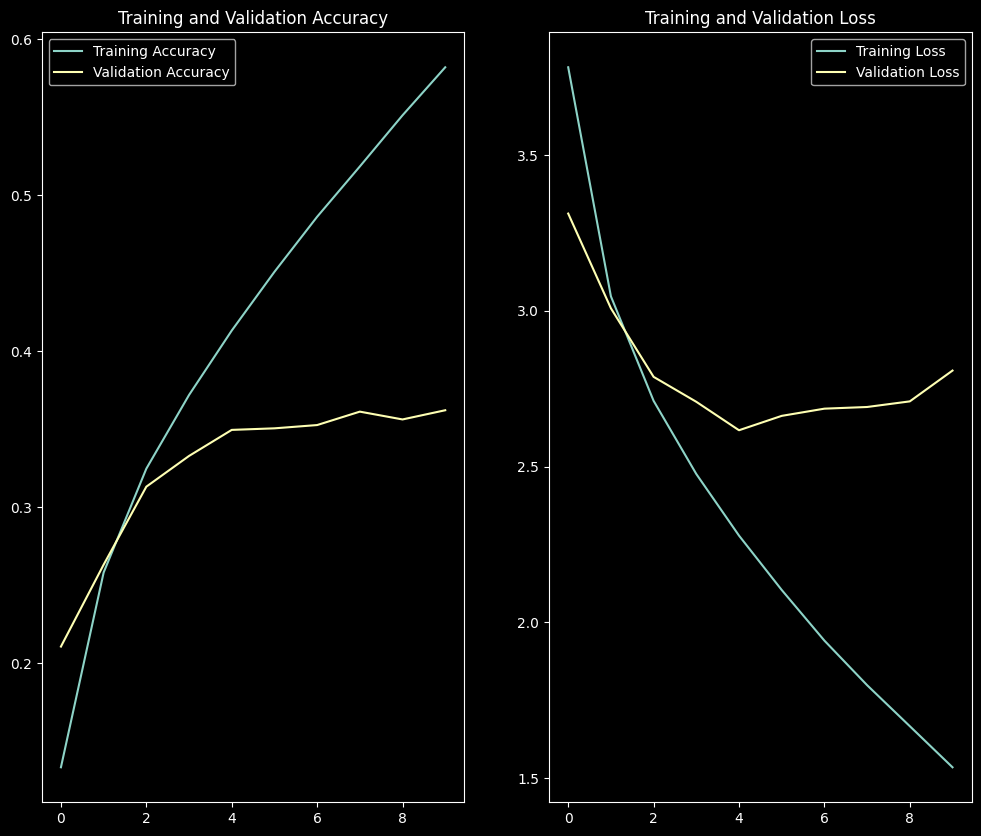

In [15]:
epochs_range = range(10)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("Images/cifar100_cnn_acc_loss.png", bbox_inches="tight")

In [16]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.7571 - sparse_categorical_accuracy: 0.3743
Test loss: 2.7464797496795654
Test accuracy: 0.3718999922275543


In [17]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
